# Relatório de Análise VIII - Identificando e Removendo Outliers

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

<img src = "compressed_box-plot.png" >

In [4]:
dados = pd.read_csv("aluguel.csv", sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


<AxesSubplot:>

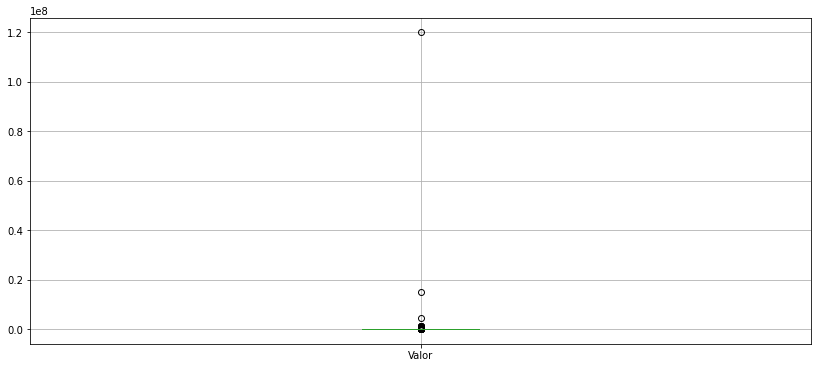

In [6]:
dados.boxplot(['Valor'])

In [9]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
826,Conjunto Comercial/Sala,Barra da Tijuca,0,0,0,5124,614000.0,NaN,NaN
884,Conjunto Comercial/Sala,Botafogo,0,56,0,4235,529375.0,114599.0,34345.0
1163,Conjunto Comercial/Sala,Cidade Nova,0,47,0,7357,514990.0,166709.0,14787.0
2722,Conjunto Comercial/Sala,Centro,0,15,0,5666,530000.0,1.0,1.0
2994,Prédio Inteiro,Barra da Tijuca,0,40,0,7500,600000.0,162000.0,13350.0
4595,Galpão/Depósito/Armazém,Irajá,0,5,0,1100,15000000.0,NaN,1000.0
4628,Prédio Inteiro,Centro,0,0,0,6986,560000.0,NaN,NaN
5565,Conjunto Comercial/Sala,Centro,0,30,0,4940,612550.0,128440.0,NaN
5592,Prédio Inteiro,Jacarepaguá,0,15,0,1200,120000000.0,NaN,10000.0
8067,Prédio Inteiro,Centro,0,90,0,7774,505310.0,NaN,NaN


In [10]:
valor = dados['Valor'] #Crio uma série para facilitar a análise
Q1 = valor.quantile(.25)
Q1


1500.0

In [11]:
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inf = Q1 - 1.5 * IIQ
limite_sup = Q3 + 1.5 * IIQ

In [12]:
selecao = (valor >= limite_inf) & (valor <= limite_sup)
dados_new = dados[selecao]

In [13]:
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


<AxesSubplot:>

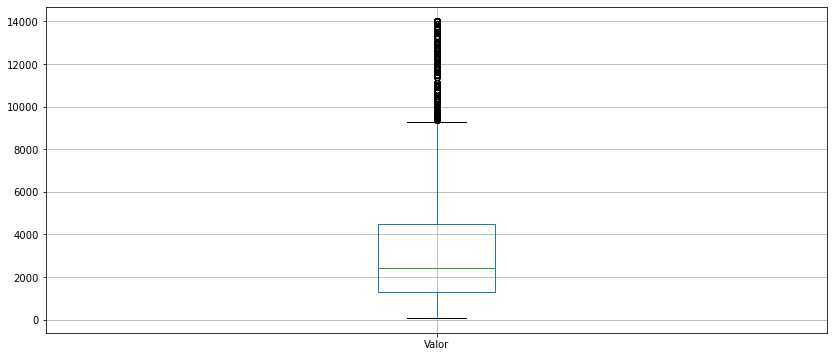

In [15]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

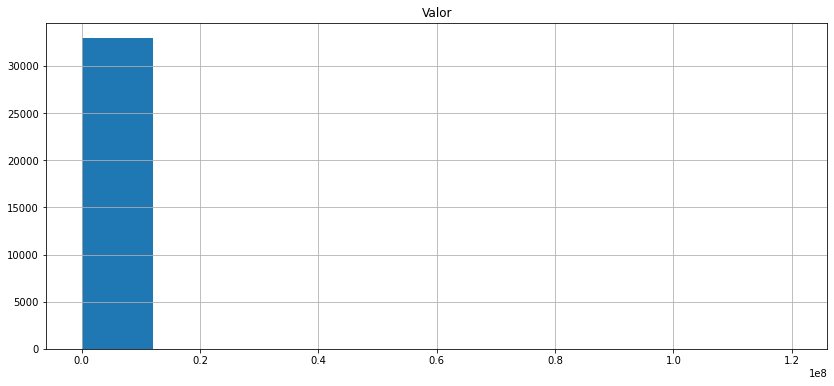

In [17]:
dados.hist(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

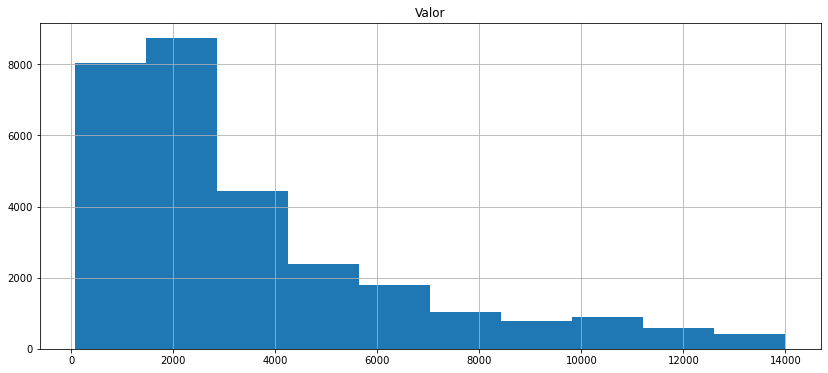

In [18]:
dados_new.hist(['Valor'])